In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


# Adjusting the dimensions of contrast of the CT image

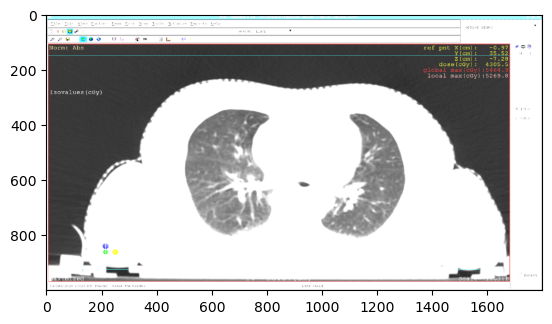

In [55]:
img = cv.imread("C:/Users/megha/OneDrive/Desktop/BACKUP/Segmentation_new/Non-segmented/1.png")
img = cv.resize(img, (1800,1000))
Z = cv.cvtColor(img, cv.COLOR_BGR2RGB)


            
def renormalize(image, pixel_value_range , pixel_value_mid):
    """

    Parameters:
    - image: numpy array, input image (e.g., CT image)
    - window_width: float, window width (W)
    - window_level: float, window level (L)

    Returns:
    - renormalised_image: numpy array, transformed image
    """
    # Calculate lower and upper bounds
    lower_bound = pixel_value_mid - (pixel_value_range / 2)
    upper_bound = pixel_value_mid + (pixel_value_range / 2)

    # Apply the transformation
    renormalised_image = np.clip(image, lower_bound, upper_bound)  # Clip values outside the range
    renormalised_image = ((renormalised_image - lower_bound) / (upper_bound - lower_bound) * 255).astype(np.uint8)

    #windowed_image = ((windowed_image - (window_level - window_width/2)) / (window_width/ 255)).astype(np.uint8)

    return renormalised_image

new_image = renormalize(Z,100,50) #50, -10 for 11-19, 200,50 for 1-8
plt.imshow(new_image)

# Selecting ROI of Lungs

In [45]:

r = cv.selectROI("Image", Z, False, False)
cv.waitKey(0) 
cv.destroyWindow("Image") 

# Resizing the image to the ROI dimensions

In [46]:

new_image = new_image[int(r[1]):int(r[1]+r[3]),  
                      int(r[0]):int(r[0]+r[2])]



# Applying Gaussian Blur and Global Thresholding

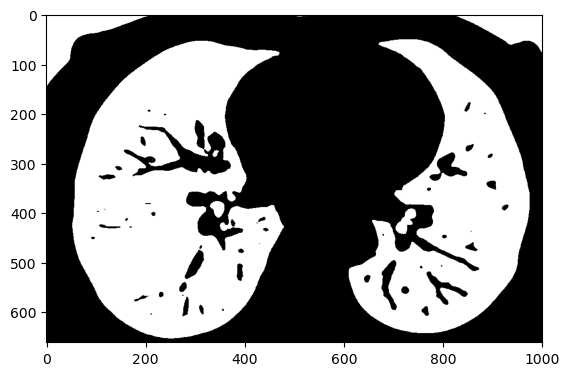

In [29]:
g_blur = cv.GaussianBlur(new_image,(3,3),0)
#global thresholding
ret1,th1 = cv.threshold(g_blur,200,255,cv.THRESH_BINARY_INV)

plt.imshow(th1)

# Finding the Contours and filtering them based on area
Selecting only the largest or the two largest contours that are the lungs

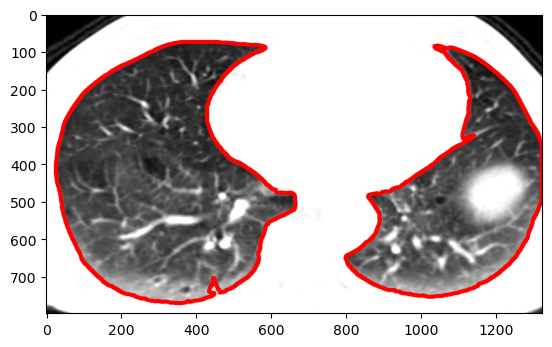

In [35]:
 # Find contours
contours, _ = cv.findContours(th1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# Find the convex hull object for each contour
# Filtering contour to remove corners
filter_contour = []
contour_area = []

for i in contours:
    hull = cv.convexHull(i)
    contour_area.append(cv.contourArea(hull,True))
    #print(cv.contourArea(hull,True))
    
contour_area.sort(reverse = True)
if contour_area[0] > 450000:
    for i in contours:
        hull = cv.convexHull(i)
        if cv.contourArea(hull,True)>=contour_area[0]:
            filter_contour.append(i)
else:
    for i in contours:
        hull = cv.convexHull(i)
        if cv.contourArea(hull,True)>=contour_area[1]:
            filter_contour.append(i)

color_contours = (0, 255, 0) # green - color for contours

img1 = cv.cvtColor(new_image, cv.COLOR_BGR2RGB)

img2 = cv.drawContours(img1, filter_contour,-1, (255,0,0), thickness = 10) #thickness 15 for heart, 255,255,255 for heart

plt.imshow(img2)


# Drawing the final contours onto the original image

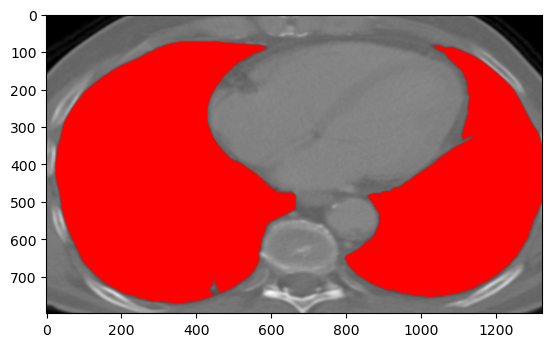

In [36]:
final_img = img.copy()

img4 = cv.drawContours(final_img[int(r[1]):int(r[1]+r[3]),  
                      int(r[0]):int(r[0]+r[2])], filter_contour,-1, (255,0,0), thickness=cv.FILLED)
plt.imshow(img4)

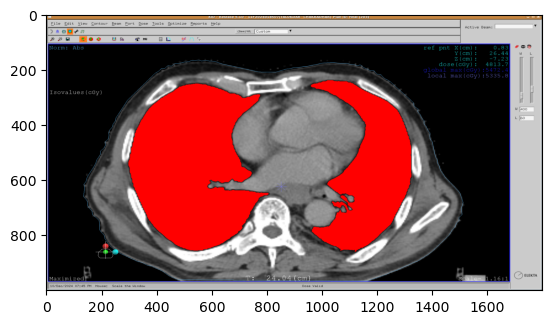

In [28]:
# r contains [x, y, width, height] of the cropped area
x, y, w, h = r  
# Create a copy of the original image to overlay the contours
img_with_contours = img.copy()

# Loop through the contours and adjust their coordinates based on the crop offset
for contour in filter_contour:
    # Adjust contour points by adding the top-left corner of the crop region
    adjusted_contour = contour + np.array([x, y])  # Add x, y offset to all points in the contour
    # Draw the contour on the original image
    cv.drawContours(img_with_contours, [adjusted_contour], -1, (255, 0, 0), thickness=cv.FILLED)  # Red color for contours
plt.imshow(img_with_contours)

In [36]:
#cv.imwrite("/home/megha-rai/Downloads/Segmentation_new/segmented_lungs/48_lungs.png",img_with_contours)

# Thresholding Histogram

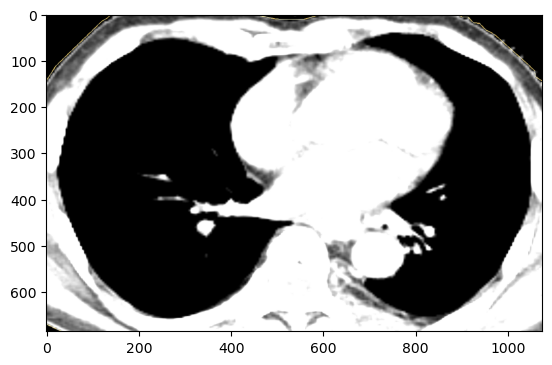

In [47]:
plt.imshow(new_image)

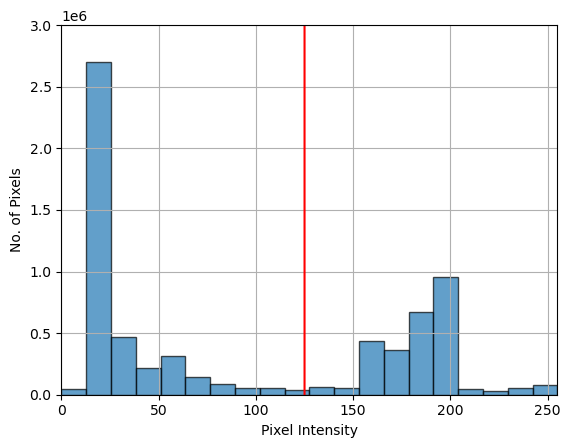

In [64]:
hist_img = cv.imread("C:/Users/megha/OneDrive/Desktop/BACKUP/Segmentation_new/Non-segmented/3.png")
flat = hist_img.flatten()

plt.hist(flat, bins = 20, edgecolor='black', alpha = 0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('No. of Pixels')
ax = plt.gca()
ax.set_xlim([0, 255])
ax.set_ylim([0, 3e6])
plt.grid()

y = np.arange(0,len(flat),1)
x = np.ones(len(flat))*125
plt.plot(x,y,'r-')


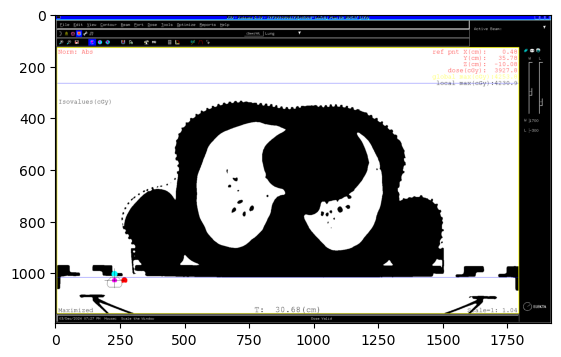

In [59]:
ret2,th2 = cv.threshold(hist_img,125,255,cv.THRESH_BINARY_INV)
plt.imshow(th2)

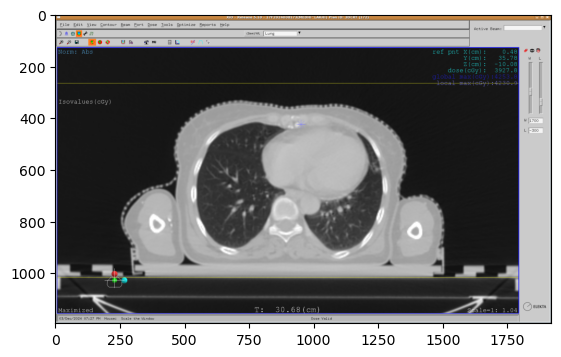

In [65]:
plt.imshow(hist_img)